# <center>  Python for biologists
    
## Data analysis


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

from IPython.display import display

# здесь любые импорты которые вам еще понадобятся (только здесь)

# Продвинутая работа с одним дата-фреймом  </br> на примере биомедицинских данных

Мы будем работать с фармакокинетическим Варифариновым датасетом `warfarin.csv` (конкретный пример взят [отсюда](https://insightrx.github.io/PKPDsim/reference/pkdata.html?q=pkdata), но почитать можно [тут](https://dataset.lixoft.com/data-set-examples/warfarin-data-set/) и [тут](https://ascpt.onlinelibrary.wiley.com/doi/10.1038/clpt.2010.37/)).

Датасет содержит следующие колонки:
- `ID` - Идентификатор пациента
- `Time` - Время внесения записи
- `WT` - Вес пациента
- `AGE` - Возраст пациента
- `SEX` - Пол пациента
- `CRCL` - Клиренс креатинина пациента (показатель работоспособности почек)
- `EVID` - Event ID - флаг который обозначает тип события: 1 - администрирование (введение) дозы варфарина, 0 - запись концентрации варфарина в крови
- `AMT` - Amount, Доза варфарина которая была дана пациенту
- `DV` - Зависимая переменная в анализе, концентрация варфарина в крови

Соотвественно про данные история такая, что не может быть одновременной записи DV и AMT. Мы либо даем дозу, либо измеряем концентрацию - не одновременно. Это и обозначает флаг EVID.  Поэтому если в DV стоит 0 - это не значит что концентрация 0, скорее всего эта запись отмечена флагом EVID 1, то мы и не знаем концентрацию, мы её не измеряли.




In [ ]:
warfarin = pd.read_csv('warfarin.csv', sep='\t')

In [ ]:
df = warfarin.copy()

### Задание 1 📈

Сколько в среднем имеется записей на пациента?


*(0.5 балла)*

In [ ]:
result = warfarin['ID'].value_counts().mean()
# YOUR CODE HERE
#raise NotImplementedError()

In [ ]:
assert result == 13.0

### Задание 2 📈

Выведите средний возраст всех пациентов.


*(0.5 балла)*

In [ ]:
result = warfarin['AGE'].mean()
# YOUR CODE HERE
#raise NotImplementedError()

In [ ]:
assert np.isclose(result, 53.0883, atol=1e-3)

### Задание 3 📈

Выведите в виде списка имена колонок, где у каждого пациента значения не меняются


*(0.5 балла)*

In [ ]:
result = []
for col in warfarin.columns:
    if warfarin.groupby('ID')[col].nunique().eq(1).all():
        result.append(col)
result.remove('ID')
# YOUR CODE HERE
#raise NotImplementedError()

In [ ]:
assert result == ['WT', 'CRCL', 'AGE', 'SEX']

### Задание 4 📈

Постройте [Spaghetti plot](https://en.wikipedia.org/wiki/Spaghetti_plot) DV vs TIME по каждому ID, отметьте вертикальными линиями моменты времени когда вводилась доза. Референсный график приеден в файле `spaghetti_plot.png`.  Обратите внимание, что на референсе `DV` не "проваливается" до 0. Почему?

Легенду по цветами выводить не надо :)

*(1.5 балла)*

     ID   TIME       DV  AMT  EVID      WT    CRCL     AGE  SEX
611  48   0.00  0.00000  100     1  52.593  86.998  56.427    1
612  48   0.25  1.47370    0     0  52.593  86.998  56.427    1
613  48   0.50  1.55660    0     0  52.593  86.998  56.427    1
614  48   1.00  1.40300    0     0  52.593  86.998  56.427    1
615  48   2.00  1.32920    0     0  52.593  86.998  56.427    1
616  48   4.00  0.90372    0     0  52.593  86.998  56.427    1
617  48   6.00  0.75592    0     0  52.593  86.998  56.427    1
618  48   8.00  0.47355    0     0  52.593  86.998  56.427    1
619  48  12.00  0.41204    0     0  52.593  86.998  56.427    1
620  48  23.90  0.16647    0     0  52.593  86.998  56.427    1
621  48  24.00  0.00000  100     1  52.593  86.998  56.427    1
622  48  36.00  0.45956    0     0  52.593  86.998  56.427    1
623  48  47.90  0.39276    0     0  52.593  86.998  56.427    1


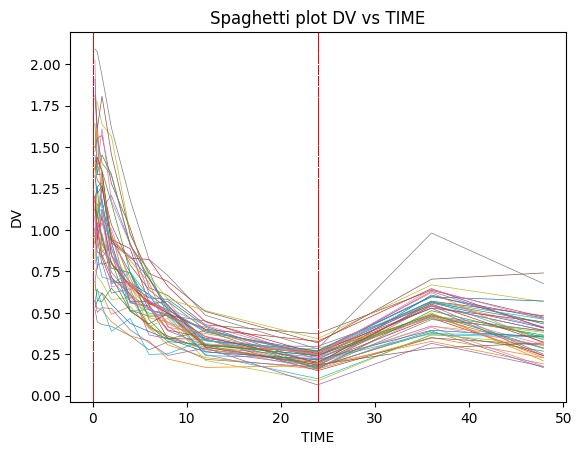

In [ ]:
fig, ax = plt.subplots()

# Проходимся по каждому ID
for id_ in df['ID'].unique():
    # Отбираем данные для текущего ID
    id_data_dose = df[df['ID'] == id_]
    id_data = id_data_dose.loc[id_data_dose['DV'] != 0.00000]
    dose_times = id_data_dose[id_data_dose['AMT'] > 0]['TIME']
    # Строим график DV vs TIME
    ax.plot(id_data['TIME'], id_data['DV'], linewidth=0.5)

    # Получаем моменты времени ввода дозы

    # Отображаем вертикальные линии для каждого момента времени ввода дозы
    for dose_time in dose_times:
        ax.axvline(x=dose_time, color='red', linestyle='--', linewidth=0.5)
# Настраиваем оси и заголовок графика
ax.set_xlabel('TIME')
ax.set_ylabel('DV')
ax.set_title('Spaghetti plot DV vs TIME')

# Отображаем график
plt.show()

#### Обратите внимание, что на референсе DV не "проваливается" до 0. Почему?

При измерении концентрации варфарина в крови (dv) и указании дозы варфарина (amt) на референсе графика отображается информация о разных моментах времени. Предполагаю, что измерение концентрации производится после определенного временного интервала после введения дозы. То есть, dv указывает на концентрацию в крови в определенный момент времени после приема дозы, в то время как amt отображает размер дозы варфарина, которую получил пациент. При таком раскладе, если значение dv равно 0, а концентрация варфарина в крови равна 100, просто означает, что ее концентрация не была измерена в этот момент времени и следовательно не должна отображаться на графике.

> Ну а далее ученые-фармакометрики строят по этим графикам математические модели (нелинейные) чтобы уметь описывать фармакокинетический профиль концентрации лекарства в крови, учитывать влияние пола / веса / генотипа / ... человека, и в конце-концов, предсказывать ту самую оптимальную дозу для конкретного пациента. Таргетная терапия! Но это уже совсем другая история.

# Продвинутая работа с несколькими дата-фреймами  </br> на примере биоинформатических данных

Мы будем работать со следующими омиксными данными:
- RNA-seq малых РНК из нейронов здорового человека и пациента с некоторым нейродегенеративным заболеванием
- ChIP-seq'и за белки 'CTCF' и 'SMC3' (они в том числе отвечают за структуру хроматина и экспрессию генов)



### Задание 6 📈 Подготовка данных


##### 1) Прочитайте данные в 3 датафрема `ctcf`, `smc3` и `rnaseq`. Для этого вам понадобится:
- Понять названия колонок (про форматы данных можно почитать [тут](https://genome.ucsc.edu/FAQ/FAQformat.html))
- Понять как прочитать BigWig данные (они бинарные). Существует библиотека `pyBigWig`, но она хранит датасеты в очень странном фармате, в данной домашке ЗАПРЕЩАЕТСЯ её использовать. Сконвертируйте в коммандной строке BigWig в bedGraph и читайте bedGraph в pandas-dataframe.
- Прочитав два дата-фрейма для РНК-сека вам нужно объединить их в один дата-фрейм добавив колонку обозначающую тип образца



##### 2) Создайте датафрейм с аннотацией генома человека версии GRCh38.p13. Для этого вам понадобится:
- Найти эту аннотацию. Я советую формат `gff3`.
- Файл будет очень большой, советую предобработать его в командной строке:
    - Отобрать только нужные колонки
    - Отобрать только записи соответвующие генам
    - (Если компьютер слабый) отобрать только записи соответствующие 15 хромосоме.
- Прочитать это дело в pandas-data frame
- Имя гена находится в последней колонке gff3, где много полей аггрегированы через `;`. Вам нужно:
    - Найти как называется нужное поле, где лежит имя гена.
    - Достать имя гена в отдельную колонку (например `gene` или `gene_name`). </br>
    Достать имя гена может быть не очень тривиально. Можно сделать это в баше, можно сделать это в питоне. Тут на ваше усмотрение. В питоне по-сути у вас есть колонка с кучей информации в виде строки откуда вам нужно что-то достать. Ровно для этого мы и разобрали [ацессор `str`](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html)! Могу предложить 2 пути:
        - (Попродвинутее)  Используйте `str.replace` с параметром `regex=True`. Не зря же мы учили регексы!
        - (Попроще) Используйте `str.split` чтобы отрезать ненужное и вырезать нужное
        
        
##### 3) Во всех датафреймах оставьте только нужные колонки
    Это колонки с хромосомой, координатами начала и конца, цепью +/-, значением сигнала (для ChIP-seq и RNA-seq) и именем гена (для аннотации)


> Да, обрабатывать готовые данные в питоне легко, но перед любым анализом всегда есть мучительный процесс поиска и подготовки.  Ведь реальный анализ всегда начинается с этого. Теперь вы будете во всеоружии!:)

*(1.5 балла)*

In [ ]:
#Скачиваем пакет для конвертации
!conda install -c bioconda ucsc-bigwigtobedgraph
!conda install -c "bioconda/label/cf201901" ucsc-bigwigtobedgraph

#Это код для конвертации
!bigWigToBedGraph /content/SmallRNAseq_desease.bigWig /content/SmallRNAseq_desease.bedGraph
!bigWigToBedGraph /content/SmallRNAseq_health.bigWig /content/SmallRNAseq_health.bedGraph

desease_df = pd.read_csv('SmallRNAseq_desease.bedGraph', sep='\t', header=None)
health_df = pd.read_csv('SmallRNAseq_health.bedGraph', sep='\t', header=None)

combined_df = pd.concat([desease_df, health_df])
combined_df['Sample_Type'] = ['Desease'] * len(desease_df) + ['Health'] * len(health_df)

CondaError: KeyboardInterrupt

Solving environment: \ | / - \ | / - \ | / - \ | / - \ | done


==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.11.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.11.0



# All requested packages already installed.



In [ ]:
data = pd.read_csv("/content/gencode.v38.annotation.gff3", sep="\t", comment="#", header=None)


In [ ]:
data

,0,1,2,3,4,5,6,7,8
0,chr1,HAVANA,gene,11869,14409,.,+,.,ID=ENSG00000223972.5;gene_id=ENSG00000223972.5...
1,chr1,HAVANA,transcript,11869,14409,.,+,.,ID=ENST00000456328.2;Parent=ENSG00000223972.5;...
2,chr1,HAVANA,exon,11869,12227,.,+,.,ID=exon:ENST00000456328.2:1;Parent=ENST0000045...
3,chr1,HAVANA,exon,12613,12721,.,+,.,ID=exon:ENST00000456328.2:2;Parent=ENST0000045...
4,chr1,HAVANA,exon,13221,14409,.,+,.,ID=exon:ENST00000456328.2:3;Parent=ENST0000045...
...,...,...,...,...,...,...,...,...,...
126353,chr1,HAVANA,exon,89117577,89117773,.,-,.,ID=exon:ENST00000370466.4:5;Parent=ENST0000037...
126354,chr1,HAVANA,CDS,89117577,89117773,.,-,1,ID=CDS:ENST00000370466.4;Parent=ENST0000037046...
126355,chr1,HAVANA,exon,89116992,89117234,.,-,.,ID=exon:ENST00000370466.4:6;Parent=ENST0000037...
126356,chr1,HAVANA,CDS,89116992,89117234,.,-,2,ID=CDS:ENST00000370466.4;Parent=ENST0000037046...


In [ ]:
# Выбираем последнюю колонку с данными
last_column = data[8]

# Взять только поле "gene" или "gene_name" (или другое необходимое поле)
gene_field = last_column.str.extract('(gene_id=.*?);', flags=re.IGNORECASE)

# Извлечь имя гена из выбранного поля
gene_name = gene_field[0].str.replace('gene_id=', '')

# Добавить новую колонку с именем гена
data['Gene'] = gene_name

In [ ]:
data.iloc[:, [1, 2, 3, 4, data.columns.get_loc("Gene")]]

,1,2,3,4,Gene
0,HAVANA,gene,11869,14409,ENSG00000223972.5
1,HAVANA,transcript,11869,14409,ENSG00000223972.5
2,HAVANA,exon,11869,12227,ENSG00000223972.5
3,HAVANA,exon,12613,12721,ENSG00000223972.5
4,HAVANA,exon,13221,14409,ENSG00000223972.5
...,...,...,...,...,...
126353,HAVANA,exon,89117577,89117773,ENSG00000162645.13
126354,HAVANA,CDS,89117577,89117773,ENSG00000162645.13
126355,HAVANA,exon,89116992,89117234,ENSG00000162645.13
126356,HAVANA,CDS,89116992,89117234,ENSG00000162645.13


In [ ]:
ctcf = pd.read_csv('CTCF_neurons.bigNarrowPeak', sep = '\t', header = None,
                   names =['chrom', 'chromStart', 'chromEnd', 'name',
                          'score', 'strand', 'signalValue', 'pValue',
                          'qValue', 'peak']).drop(columns = ['name',
                          'score', 'pValue', 'qValue',]).reset_index(drop = True)
smc3 = pd.read_csv('SMC3_neurons.bigNarrowPeak', sep = '\t', header = None,
                  names =['chrom', 'chromStart', 'chromEnd', 'name',
                          'score', 'strand', 'signalValue', 'pValue',
                          'qValue', 'peak']).drop(columns = ['name',
                          'score', 'pValue', 'qValue']).reset_index(drop = True)

# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: ignored

### Задание 7 📈 Аннотация

1) Возьмите данные ChIP-seq и аннотацию. Для экономии ресурсов отберите только 15 хромосому.
2) Смерджте дата-фреймы ChIP-seq так чтобы получить набор только пересекающихся пиков
3) Обработайте смердженный датафрейм:
    - Создайте колонки `start` и `stop` которые будут отмечать координаты объединения двух пиков (то есть самое левое начало и самый правый конец)
    - Отберите топ 100 записей по суммарной интенсивности сигналов CTCF и SMC3
    - Отберите только нужные колонки: хромосома, `start` и `stop`, интенсивности сигналов
    
    </br>

4) Добавьте аннотацию.
    - Смерджьте датафрейм пиков с датафремом аннотации.
    - Отберите только те пики, которые покрывают НАЧАЛО какого-то гена (т.к. регуляция экспрессии обычно происходит в начале гена, нам интересно посмотреть на началах каких генов сидят CTCF и SMC3
    - Напечатайте этот датафрейм.

    </br>

5) Биоинформатика... </br>
    А теперь, если бы это были ваши данные, вы бы пошли гуглить, что же за гены оказались потенциально под очень сильным влиянием одновременно и CTCF и SMC3. Но это уже совсем другая история.


*(3 балла)*

In [ ]:
#Взяли данные https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM1385748

--2023-12-16 16:45:05--  https://sra-downloadb.be-md.ncbi.nlm.nih.gov/sos5/sra-pub-run-32/SRR000/576/SRR576933/SRR576933.2
Resolving sra-downloadb.be-md.ncbi.nlm.nih.gov (sra-downloadb.be-md.ncbi.nlm.nih.gov)... 130.14.250.18, 130.14.250.24, 130.14.250.28, ...
Connecting to sra-downloadb.be-md.ncbi.nlm.nih.gov (sra-downloadb.be-md.ncbi.nlm.nih.gov)|130.14.250.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 83122876 (79M) [application/x-troff-man]
Saving to: ‘SRR576933.2’

SRR576933.2         100%[===================>]  79.27M  85.7MB/s    in 0.9s    

2023-12-16 16:45:06 (85.7 MB/s) - ‘SRR576933.2’ saved [83122876/83122876]



In [ ]:
chip_seq_data = pd.read_csv("/content/GSM1385748_NTKO_EZH2_15_run1.txt", delimiter='\t' )

In [ ]:
chip_seq_data

,chr1,829883,830201,-21.6876,42.2105,830091,58,65.2,318,830042,49
0,chr1,840500,843481,-29.6130,54.6449,841515,91,34.0,2981,841990,475
1,chr1,845712,846743,-27.2291,47.2765,846531,82,79.4,1031,846227,304
2,chr1,848156,853263,-80.3920,105.2728,850045,192,37.0,5107,850709,664
3,chr1,853651,856142,-33.4516,59.5183,854807,90,46.4,2491,854896,89
4,chr1,856577,856825,-17.4318,36.0816,856736,49,63.9,248,856701,35
...,...,...,...,...,...,...,...,...,...,...,...
2966,chrY,11712864,11713069,-20.1560,14.7910,11712959,27,46.1,205,11712966,7
2967,chrY,11713202,11714626,-43.2683,26.9939,11714263,53,74.5,1424,11713914,349
2968,chrY,11714809,11715522,-28.9698,19.7701,11715218,38,57.3,713,11715165,53
2969,chrY,11718712,11718879,-26.6247,18.8504,11718859,33,87.5,167,11718795,64


In [ ]:
chromosomes = ['chr15']
chip_seq_data_filtered = chip_seq_data[chip_seq_data['chr1'].isin(chromosomes)]

In [ ]:
chip_seq_data_filtered

,chr1,829883,830201,-21.6876,42.2105,830091,58,65.2,318,830042,49
863,chr15,20758861,20759048,-25.3491,45.0308,20758961,57,53.2,187,20758954,7
864,chr15,20759221,20759818,-23.5148,44.6663,20759262,57,6.9,597,20759519,257
865,chr15,27901681,27902910,-35.7553,52.0052,27902417,88,59.8,1229,27902295,122
866,chr15,29471634,29471858,-19.2983,33.8696,29471724,46,40.0,224,29471746,22
867,chr15,37659771,37660184,-19.4409,34.3505,37659842,49,17.1,413,37659977,135
868,chr15,38358968,38359165,-19.7265,33.7360,38359070,50,51.5,197,38359066,4
869,chr15,39007364,39010743,-68.5276,82.5175,39009396,166,60.1,3379,39009053,343
870,chr15,39573640,39574050,-25.1036,39.5885,39573804,62,39.9,410,39573845,41
871,chr15,62231069,62232147,-30.4058,47.4412,62231505,76,40.4,1078,62231608,103
872,chr15,63456187,63457210,-31.6030,50.4864,63456424,73,23.1,1023,63456698,274


In [ ]:
# можете создавать доп. ячейки, но, пожалуйста, перед отправкой соберите всё в эту

# YOUR CODE HERE
raise NotImplementedError()

### Задание 8 📈 Статистическое сравнение данных

 Данные у вас хранятся в агрегированном виде (координаты сжаты до начал и концов интервалов). В связи с этим невозможно делать статистическое сравнение сигналов, так как, условно, какой-то сигнал задан на интервале в 100 п.н., а какой-то в 1000 п.н.. Поэтому данные придется немного предобработать.

1) Возьмите данные RNA-seq. Для экономии ресурсов отберите только 15 хромосому.
2) Переведите датафрейм `['chr', 'start', 'stop', 'signalValue']` в `['chr', 'pos', 'signalValue']`, то есть чтобы у вас каждая позиция была записана в явном виде.

Было:
```python
start stop signal
1     2    10
4     6    100
```
Стало:
```python
pos signal
1    10
2    10
4    100
5    100
6    100
```

Сделать можно разными путями. Я могу посоветовать например [такое](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.explode.html). Для этого нужно иметь одну колонку где все нужные координаты из интервала будут записаны в виде списка (все, а не только начало и конец). Я думаю, что проще всего это будет сделать с помощью `apply` (мы же умеем применять его к строкам) и старого доброго `range` :)


3) Статистически интенсивности сигналов РНК-сека на хромосоме 15 между двумя группами образцов. Следите чтобы ваши выводы были корректными.

#### Самый главный график

4) Нарисуйте 2 боксполта интенсивностей сигналов РНК-сека (в log-шкале по y) и проаннотируйте над ними p-value. Если вызывает трудности, начните [отсюда](https://stackoverflow.com/questions/36578458/how-does-one-insert-statistical-annotations-stars-or-p-values). Можете найти референс в файле `boxplot.png`


*(2.5 балла)*

In [ ]:
# можете создавать доп. ячейки, но, пожалуйста, перед отправкой соберите всё в эту

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
#Скачиваем файл отсюда https://www.ncbi.nlm.nih.gov/sra/SRX22865765[accn]

> Получается, мы показали наличие или отсутствие разницы в экспрессии малых РНК в нейронах между здоровыми людьми и пациентами с некоторым нейродегенеративным заболеванием. Осталось найти статьи чтобы проследить связь этих РНК с функциями некоторых конкретных генов и белков - и пожалуйста, у вас уже есть готовые наметки чтобы выстраивать патоэтиологию заболевания. Но это уже совсем другая история.